In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Applying Supervised Learning for the dataset 

In [72]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
data=data.drop('Id',axis=1)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [75]:
data['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

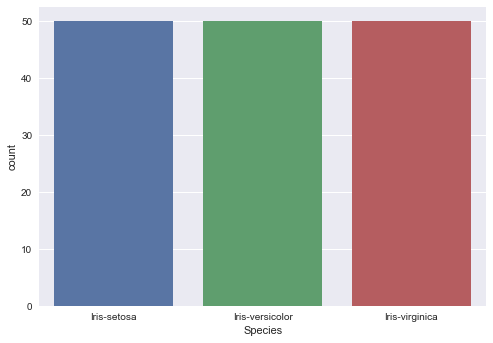

In [76]:
sns.set(style="darkgrid")
sns.countplot(x="Species", data=data)


** The dataset is balanced over all the classes **

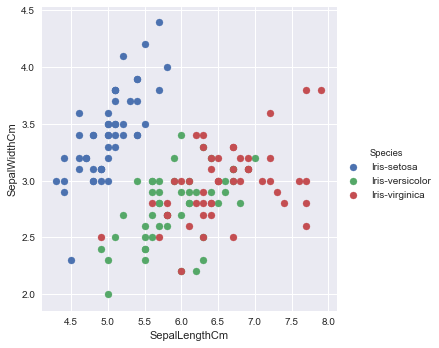

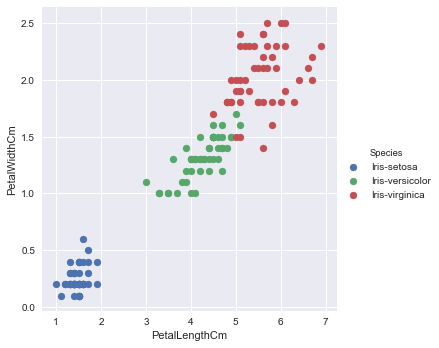

In [77]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(data, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()
sns.FacetGrid(data, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

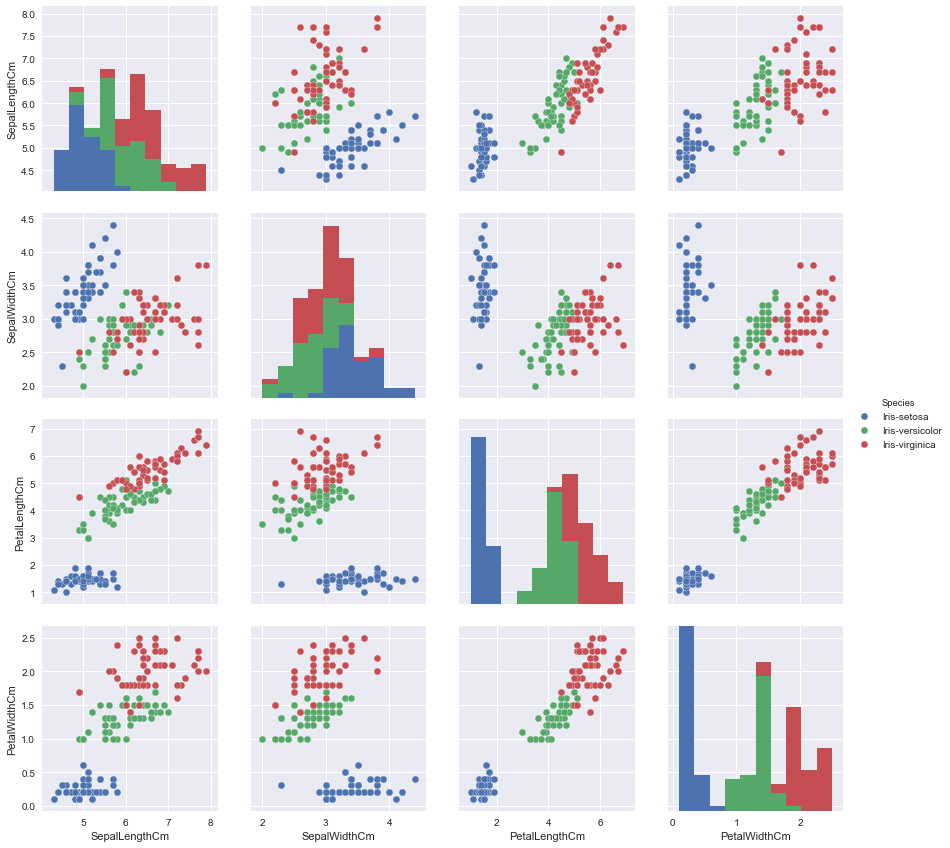

In [78]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(data, hue="Species", size=3)

** For any combination of features we can identify distinct clusters based on the label **

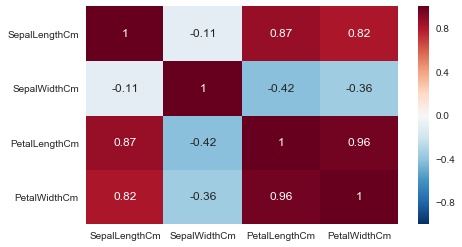

In [79]:
plt.figure(figsize=(7,4))
sns.heatmap(data.corr(),annot=True) #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

** Actually all the features are important, but to view the decision boundaries of the classifier I select 2 features with highest correlations: PetalLength and PetalWidth **

# Plotting the decision Boundaries

In [80]:
X=data[['PetalLengthCm','PetalWidthCm']]
y=data['Species']

In [81]:
X.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


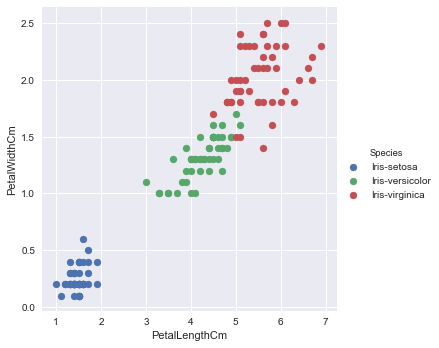

In [82]:
sns.FacetGrid(data, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

In [83]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled.shape

(150, 2)

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y=le.fit_transform(y)

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.3,random_state=0)

In [86]:
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)


In [87]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, Y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, Y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test, Y_test)))

The accuracy of the svm classifier on training data is 0.95 out of 1
The accuracy of the svm classifier on test data is 0.98 out of 1


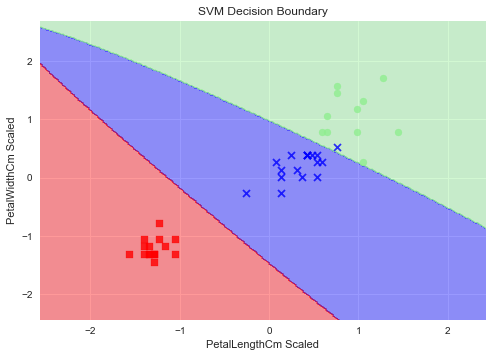

In [88]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

plot_decision_regions(X_test, Y_test, svm)
plt.title('SVM Decision Boundary')
plt.xlabel('PetalLengthCm Scaled')
plt.ylabel('PetalWidthCm Scaled')

In [89]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train, Y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score(X_train, Y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score(X_test, Y_test)))

The accuracy of the knn classifier is 0.95 out of 1 on training data
The accuracy of the knn classifier is 1.00 out of 1 on test data


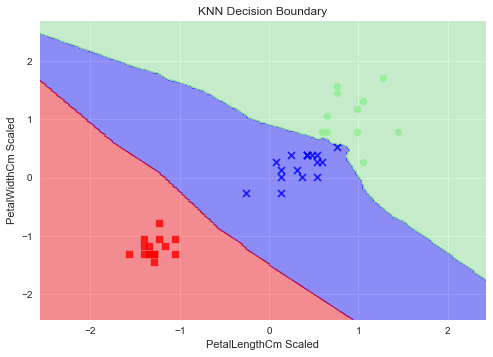

In [90]:
plot_decision_regions(X_test, Y_test, knn)
plt.title('KNN Decision Boundary')
plt.xlabel('PetalLengthCm Scaled')
plt.ylabel('PetalWidthCm Scaled')

In [91]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0,max_depth=4)
dtc.fit(X_train,Y_train)
print('The accuracy of the dtc classifier is {:.2f} out of 1 on training data'.format(dtc.score(X_train, Y_train)))
print('The accuracy of the dtc classifier is {:.2f} out of 1 on test data'.format(dtc.score(X_test, Y_test)))

The accuracy of the dtc classifier is 0.98 out of 1 on training data
The accuracy of the dtc classifier is 0.98 out of 1 on test data


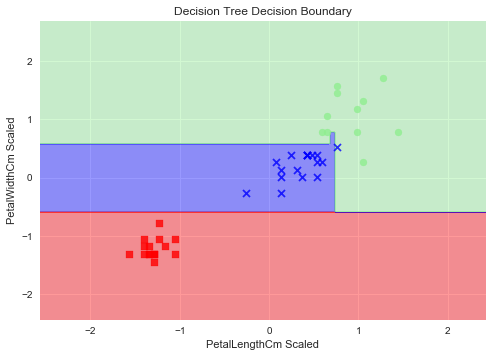

In [92]:
plot_decision_regions(X_test, Y_test, dtc)
plt.title('Decision Tree Decision Boundary')
plt.xlabel('PetalLengthCm Scaled')
plt.ylabel('PetalWidthCm Scaled')

In [93]:
from sklearn.ensemble import RandomForestClassifier
rmf=RandomForestClassifier(random_state=0,max_depth=6)
rmf.fit(X_train,Y_train)
print('The accuracy of the rmf classifier is {:.2f} out of 1 on training data'.format(rmf.score(X_train, Y_train)))
print('The accuracy of the rmf classifier is {:.2f} out of 1 on test data'.format(rmf.score(X_test, Y_test)))

The accuracy of the rmf classifier is 0.98 out of 1 on training data
The accuracy of the rmf classifier is 0.96 out of 1 on test data


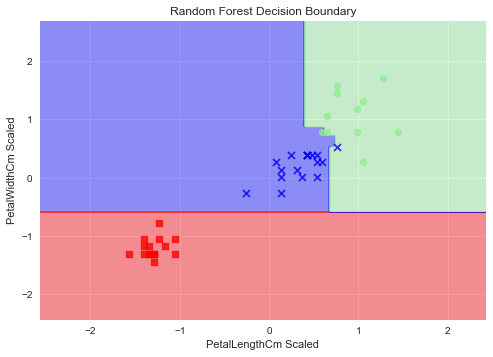

In [94]:
plot_decision_regions(X_test, Y_test, rmf)
plt.title('Random Forest Decision Boundary')
plt.xlabel('PetalLengthCm Scaled')
plt.ylabel('PetalWidthCm Scaled')

# Decision Boundaries for all the possibilities 

**Should actually have 6 different plots with decision boundaries, Shown below **

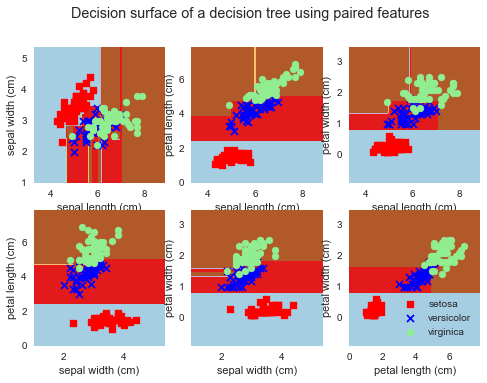

In [95]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
plot_step = 0.02

# Load data
iris = load_iris()
markers = ('s', 'x', 'o', '^', 'v')
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])


    # Plot the training points
    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=colors[i],marker=markers[i], label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

** For the decision tree visualization: http://scikit-learn.org/stable/modules/tree.html **

# Unsupervised Learning Techniques

** Now lets use the same dataset but without the label. We need to learn from the data and observe if there are any clusters**

In [96]:
data=pd.read_csv("Iris.csv")
y=data['Species']
data=data.drop(['Id','Species'],axis=1)
data.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


** Now the data is not labeled and it has 4 features. So it cannot be visualized. Now we use PCA to compress the data in 2 dimensions to basically see if there is any structure **

** Before applying PCA it is recommended to feature scaling **

In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(data)

In [98]:
data_scaled.shape

(150, 4)

In [99]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(data_scaled)
data_pca_array=pca.transform(data_scaled)
data_pca=pd.DataFrame(data_pca_array,columns=['PC1','PC2'])
data_gmm=pd.DataFrame(data_pca_array,columns=['PC1','PC2'])
data_pca.head()


,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


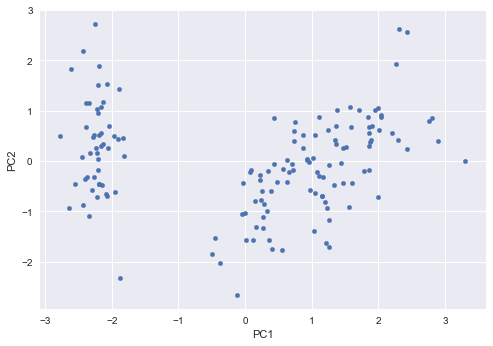

In [100]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
data_pca.plot(kind="scatter", x="PC1", y="PC2")
plt.show()

# KMeans Clustering

In [101]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,random_state=0)
km.fit(data_pca)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(data_pca)
y_cluster_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [102]:
data_pca['Cluster Predicitions']=y_cluster_kmeans
data_pca['Actual Clusters']=y

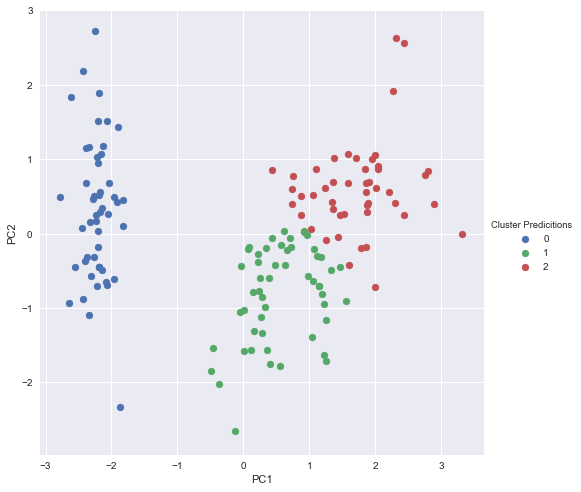

In [103]:
sns.FacetGrid(data_pca, hue="Cluster Predicitions", size=7) \
   .map(plt.scatter, "PC1", "PC2") \
   .add_legend()

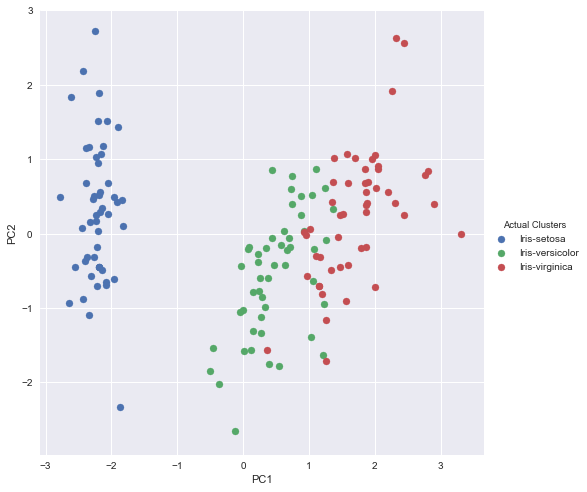

In [104]:
sns.FacetGrid(data_pca, hue="Actual Clusters", size=7) \
   .map(plt.scatter, "PC1", "PC2") \
   .add_legend()

# Gaussian Mixture Model (GMM) Clustering

In [105]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=3)
gmm.fit(data_gmm)
y_cluster_gmm=gmm.predict(data_gmm)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0], dtype=int64)

In [106]:
data_gmm['Cluster Predicitions']=y_cluster_gmm
data_gmm['Actual Clusters']=y

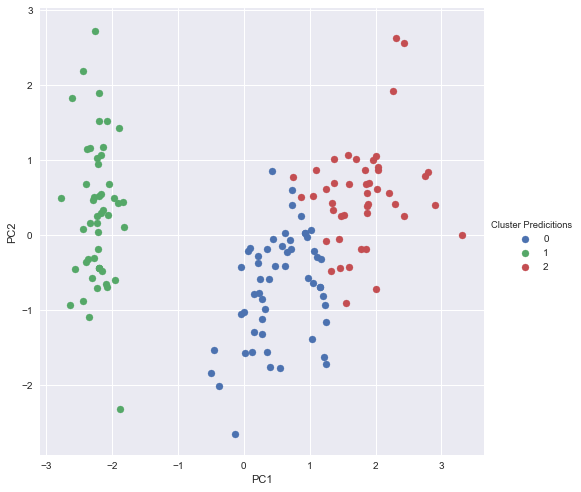

In [107]:
sns.FacetGrid(data_gmm, hue="Cluster Predicitions", size=7) \
   .map(plt.scatter, "PC1", "PC2") \
   .add_legend()

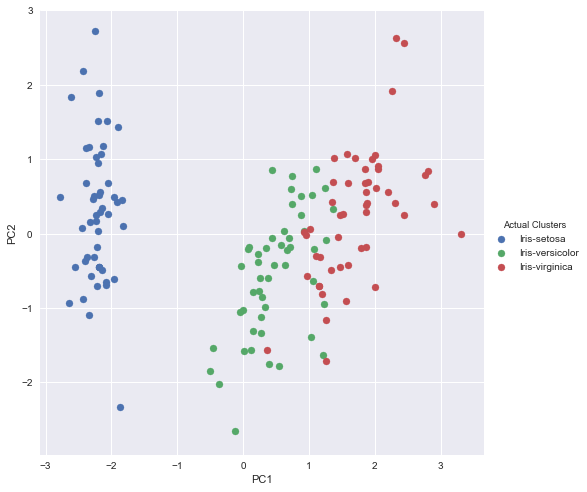

In [108]:
sns.FacetGrid(data_gmm, hue="Actual Clusters", size=7) \
   .map(plt.scatter, "PC1", "PC2") \
   .add_legend()